#### 알고리즘 구분용 용어
- ensemble
- bagging
- boosting

#### ensemble
- 합창, 합주 → 1인 x, **여럿이서 진행**
- 대부분 Decision Tree 기반으로 만들어짐
- 최종 결과를 도출할 때, n개의 알고리즘 결과값을 이용하는 방법
- ex) 회귀 : n개의 알고리즘 결과값들의 평균
- ex) 분류 : n개의 알고리즘 결과값들을 투표
- 대표적인 알고리즘 : RandomForest, Extra Tree, Gradient Boosting

#### bagging
- bootstrap + aggregation + ing
- bootstrap으로 도출한 여러개의 결과를 합산
- bootstrap으로 서로 조금씩 다른 데이터셋 n개를 만들고, n개의 데이터셋에 대해 학습을 진행 (조금씩 다르게 학습됨) → n개의 학습된 예측결과를 합산

#### boosting
- 이전 모델의 오차를 보완하는 방향으로 만들어짐 → 정형 데이터 기분으로 가장 정확도가 높은 알고리즘 (잘 사용했을 때)
- 속도가 느림
- 대충 사용하면 RandomForest보다 성능이 안좋음 → tuning

#### 분류 문제의 평가지표
- 혼동행렬 개념 도입
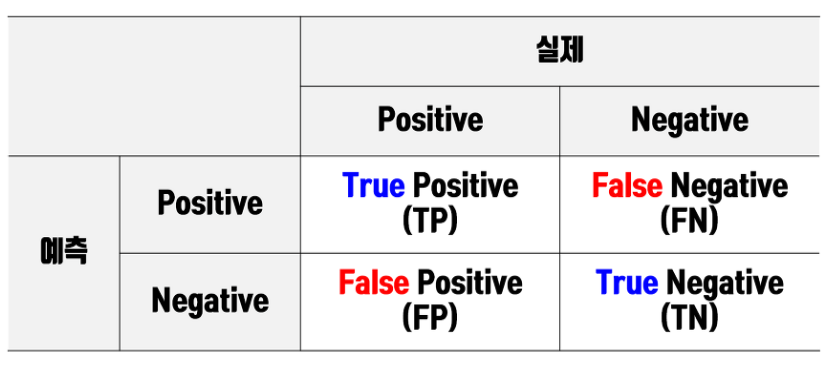

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('test2_modify.csv')
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DepositType', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'Foreigner', 'Country_Ratio', 'Country_Simple', 'car_yes',
       'RA', 'RA_Changed'],
      dtype='object')

In [7]:
label = 'IsCanceled'
features = ['LeadTime', 'ArrivalDateYear',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR',
       'TotalOfSpecialRequests', 'day_stay',
       'Foreigner', 'Country_Ratio', 'car_yes', 'RA_Changed']

train, test = df[0::2], df[1::2]
test = test.reset_index()
train = train.reset_index()

X_train, Y_train = train[features], train[label]
X_test, Y_test = test[features], test[label]

In [5]:
from sklearn.tree import DecisionTreeClassifier as dt

In [8]:
model = dt(max_depth = 5)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [9]:
for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = Y_test
for_plot

,predict,actual
0,0,0
1,0,0
2,1,1
3,1,0
4,1,0
...,...,...
19793,0,0
19794,0,0
19795,0,0
19796,0,0


#### accuracy
- 전체 중에 맞춘 비율
- 정확도 = 예측 결과와 실제 값이 맞은 건수 / 전체 데이터 수
- acc = (TP + TN) / (TP + TN + FN + FP)

#### precision
- 모델이 T라고 분류한 것 중에서 실제 T인 것의 비율
- prec = TP / (TP + FP)

#### recall
- 실제 T인 것 중에서 모델이 T라고 예측한 것의 비율
- recall = TP / (TP + FN)
- sensitivity, hit rate
- TPR (True Positive Rate)

#### precision / recall 차이점
- 화재경보 (불이 난 경우 : 1, 안 난 경우 : 0)
- FP : 불이 났다고 판단했는데, 실제로는 불이 안 남
- FN : 불이 안 났다고 판단했는데, 실제로는 불이 남
- 중점 : FN
- 경중의 차이가 큼

#### 스펨메일 분류
- 스펨인 경우 : 1, 아닌 경우 : 0
- FP : 스펨이라고 판단했는데, 실제로는 아닌 경우
- FN : 스펨이 아니라고 판단했는데, 실제로는 스펨인 경우
- 중점 : FP

#### 게임 어뷰저 분류
- 어뷰저인 경우 : 1, 아닌 경우 : 0
- FP : 어뷰저라고 판단했는데, 실제로는 어뷰저가 아닌 경우
- FN : 어뷰저가 아니라고 판단했는데, 실제로는 어뷰저인 경우
- 중점 : 애매함

In [10]:
from sklearn.metrics import confusion_matrix as cm

In [11]:
# TN, FP, FN, TP = cm([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

TN, FP, FN, TP = cm(for_plot['actual'], for_plot['predict']).ravel()
print(TN, FP, FN, TP)

13424 849 2490 3035


In [13]:
acc = (TP + TN) / (TP + TN + FN + FP)
acc

0.831346600666734

In [14]:
prec = TP / (TP + FP)
prec

0.7814109165808445

In [16]:
recall = TP / (TP + FN)
recall

0.5493212669683258

#### 언제 accuracy 대신 precision과 recall 등이 고려되는가?
- class imbalance issue가 발생했을 때 accuracy의 의미가 떨어짐

#### ROC Curve
- AUC (Area Under Curve)

In [18]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [19]:
m1, m2, m3 = dt(), rf(), gb()
m1.fit(X_train, Y_train)
m2.fit(X_train, Y_train)
m3.fit(X_train, Y_train)

GradientBoostingClassifier()

In [20]:
m2.predict_proba(X_test)

array([[0.83, 0.17],
       [0.69, 0.31],
       [0.29, 0.71],
       ...,
       [0.99, 0.01],
       [0.88, 0.12],
       [0.79, 0.21]])

In [21]:
r1 = pd.DataFrame(m1.predict_proba(X_test), columns=['neg', 'pos'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns=['neg', 'pos'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns=['neg', 'pos'])

In [22]:
from sklearn.metrics import roc_curve

In [23]:
x1, y1, _ = roc_curve(Y_test, r1['pos'])
print(x1)

[0.         0.11048833 0.11069852 0.11090871 0.11097877 0.11245008
 0.11287045 0.11322077 0.11448189 0.11462201 0.11497233 1.        ]


In [24]:
import matplotlib.pyplot as plt

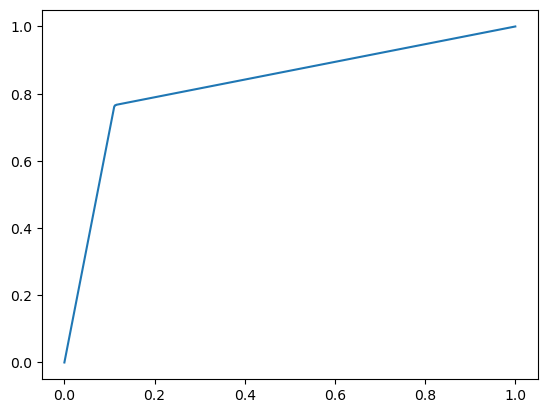

In [25]:
plt.plot(x1, y1)

In [26]:
x1, y1, _ = roc_curve(Y_test, r1['pos'])
x2, y2, _ = roc_curve(Y_test, r2['pos'])
x3, y3, _ = roc_curve(Y_test, r3['pos'])

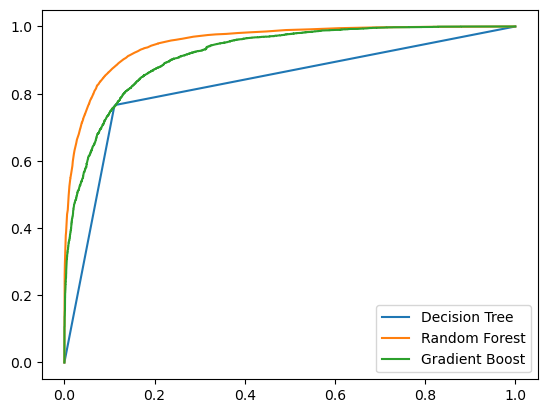

In [27]:
plt.plot(x1, y1, label = 'Decision Tree')
plt.plot(x2, y2, label = 'Random Forest')
plt.plot(x3, y3, label = 'Gradient Boost')
plt.legend()